The following 2 cells solve for the position of 5 pistons attached in series by strings with stiffness k

In [6]:
import numpy as np
k1,k2,k3,k4 = 1,3,7,8
F = 15
A = np.array([[k1,-k1,0,0,0],[-k1,k1+k2,-k2, 0,0], [0,-k2,k2+k3,-k3,0],[0,0,-k3,k3+k3,-k4],[0,0,0,-k4,k4]])
b = np.array([F,0,0,0,-F])

x = np.linalg.solve(A,b)

x

array([22.14285714,  7.14285714,  2.14285714, -0.        , -1.875     ])

In [7]:
A2 = np.array([[k1,-k1,0,0],[-k1,k1+k2,-k2,0],[0,-k2,k2+k3,-k3],[0,0,-k3,k3+k4]])
b2 = np.array([F,0,0,0])

x2 = np.linalg.solve(A2,b2)

x2

array([24.01785714,  9.01785714,  4.01785714,  1.875     ])

The following cells solve the HVAC system shown below

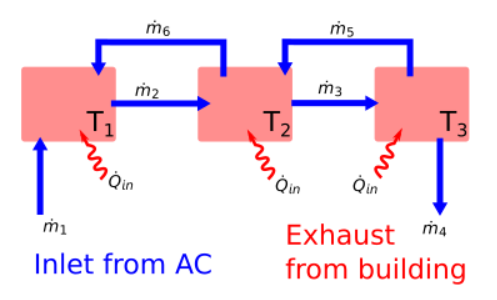


In [8]:
m1,m2,m3,m4,m5,m6 = 0.1,0.12,0.12,0.1,0.02,0.02
Cp, Qin, Tin = 1000, 300, 12
# m2CpT1 - m6CpT2 = m1CpTin + Qin
# m2CpT1 + m5CpT3 - m3CpT2 - m6CpT2 = -Qin
# m3CpT2 - m5CpT3 -m4CpT3 = -Qin

A3 = np.array([[m2*Cp, -m6*Cp, 0],[m2*Cp, -m3*Cp - m6*Cp, m5*Cp],[0,m3*Cp,-m5*Cp-m4*Cp]])
b3 = np.array([m1*Cp*Tin + Qin,-Qin,-Qin])

x3 = np.linalg.solve(A3,b3)

np.set_printoptions(precision=2)

print("x3:", x3)
print(f"The coldest room is room {np.argmin(x3)+1}, at {np.min(x3):.2f} degrees")
print(f"The warmest room is room {np.argmax(x3)+1}, at {np.max(x3):.2f} degrees")

x3: [15.58 18.5  21.  ]
The coldest room is room 1, at 15.58 degrees
The warmest room is room 3, at 21.00 degrees


In [11]:
ans = A3*x3
ans = np.sum(ans, axis = 1)
print(ans)

[1500. -300. -300.]


The following solves the condition of Hilbert matrices of size N

In [13]:
N = [1, 5, 10, 15, 20]
H = []

for k in range(len(N)):
    Hx = np.zeros((N[k], N[k]))
    for i in range(0, N[k]):
        for j in range(0, N[k]):
            Hx[i, j] = 1 / (i + j + 1)
    H.append(Hx)
cond = np.zeros(len(H))
for i in range(len(H)):
    cond[i] = np.linalg.cond(H[i])
cond

array([1.00e+00, 4.77e+05, 1.60e+13, 3.37e+17, 6.81e+18])

In [14]:
pows = []
for number in cond:
    magnitude = int(np.log10(abs(number)))
    pows.append(magnitude)
# error = 10^(16-power)
error = np.zeros(len(pows))
for i in range(5):
    error[i] = 10**(16-pows[i])
#error
print("Rounding error = {:.0e}, {:.0e}, {:.0e}, {:.0e}, {:.0e}.".format(*error))

Rounding error = 1e+16, 1e+11, 1e+03, 1e-01, 1e-02.


The following cells solve for the system below with masses 1,2,3,4 kg and stiffness 100N/m

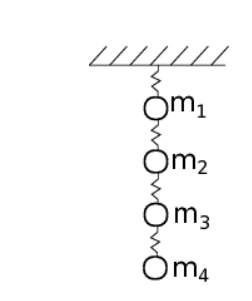

In [15]:
k = 100
m1,m2,m3,m4 = 1,2,3,4
g = 9.81
A4 = np.array([[2*k,-k,0,0],[-k,2*k,-k,0],[0,-k,2*k,-k],[0,0,-k,k]])
b4 = np.array([m1*g,m2*g,m3*g,m4*g])

x4 = np.linalg.solve(A4,b4)
for i,x in enumerate(x4, start = 1):
    print(f"x{i} = {x:.2f}", end = " ")

x1 = 0.98 x2 = 1.86 x3 = 2.55 x4 = 2.94 

In [16]:
def GaussNaive(A,y):
    '''GaussNaive: naive Gauss elimination
    x = GaussNaive(A,b): Gauss elimination without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    y = right hand side vector
    returns:
    ---------
    x = solution vector
    Aug = augmented matrix (used for back substitution)'''
    [m,n] = np.shape(A)
    Aug = np.block([A,y.reshape(n,1)])
    Aug = Aug.astype(float)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination 
    for k in range(0,n-1):
        for i in range(k+1,n):
            if Aug[i,k] != 0.0:
                factor = Aug[i,k]/Aug[k,k]
                Aug[i,:] = Aug[i,:] - factor*Aug[k,:]
    # Back substitution
    x=np.zeros(n)
    for k in range(n-1,-1,-1):
        x[k] = (Aug[k,-1] - Aug[k,k+1:n]@x[k+1:n])/Aug[k,k]
    return x,Aug

The following cells solve the truss structure below, given an angle alpha of 75 degrees and a force F of 1kN

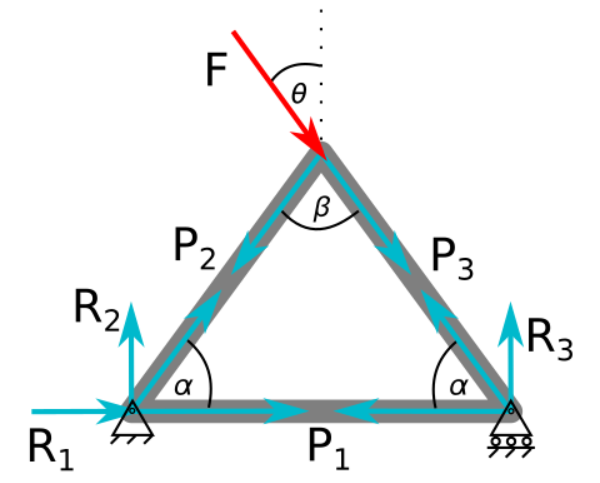

In [17]:
F5 = 1000
alp = 75

# Theta = 0 in this case

A5 = np.array([[1,np.cos(alp),0],[0,2*np.cos(alp),0],[0,-np.sin(alp),1]])
b5 = np.array([0,F5,0])

x5, Aug5 = GaussNaive(A5,b5)
print(f"The resultant augmented matrix is {Aug5}")

The resultant augmented matrix is [[ 1.00e+00  9.22e-01  0.00e+00  0.00e+00]
 [ 0.00e+00  1.84e+00  0.00e+00  1.00e+03]
 [ 0.00e+00  0.00e+00  1.00e+00 -2.10e+02]]


In [57]:
from scipy.linalg import lu
p,l,u = lu(A5)

print(f"l = {l}, \n u = {u}")

l = [[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.21 1.  ]], 
 u = [[1.   0.92 0.  ]
 [0.   1.84 0.  ]
 [0.   0.   1.  ]]


In [58]:
def solveLU(L,U,b):
    '''solveLU: solve for x when LUx = b
    x = solveLU(L,U,b): solves for x given the lower and upper 
    triangular matrix storage
    uses forward substitution for 
    1. Ly = b
    then backward substitution for
    2. Ux = y
    
    Arguments:
    ----------
    L = Lower triangular matrix
    U = Upper triangular matrix
    b = output vector
    
    returns:
    ---------
    x = solution of LUx=b '''
    n=len(b)
    x=np.zeros(n)
    y=np.zeros(n)
        
    # forward substitution
    for k in range(0,n):
        y[k] = b[k] - L[k,0:k]@y[0:k]
    # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n])/U[k,k]
    return x

In [65]:
x5 = solveLU(l,u,b5)
print('{:.2f}'.format(x5[0]))

-500.00


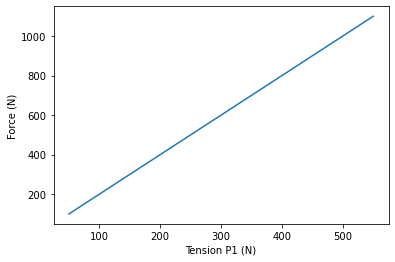

In [76]:
import matplotlib.pyplot as plt

Fv = np.arange(100,1101,10)
P1a = np.zeros(len(Fv))
for i in range(len(Fv)):
    bv = np.array([0,Fv[i],0])
    xv, Augv = GaussNaive(A5,bv)
    P1a[i] = xv[0]
plt.figure();
plt.plot(abs(P1a),Fv);
plt.ylabel("Force (N)");
plt.xlabel("Tension P1 (N)");

# Positive tension shows up as a negative number with the way the equations are set up, so I've plotted the absolute value of
# P1 vs F

In [95]:
alp3 = 75
beta3 = 30
theta3 = 45
F3 = 1000

Aq3 = np.array([[-1,0,np.cos(alp3),0,0,0],[0,-np.sin(beta3/2),np.sin(beta3/2),0,0,0],[0,np.cos(beta3/2),np.cos(beta3/2),0,0,0],[0,np.sin(alp3),0,1,0,0],[1,np.cos(alp3),0,0,1,0],[0,0,np.sin(alp3),0,0,1]])
bq3 = np.array([0,-F3*np.sin(theta3),F3*np.cos(theta3),0,0,0])

xq3, Augq3 = GaussNaive(Aq3,bq3)

np.set_printoptions(precision=2, suppress=True)
print(Augq3)
print(bq3)
# Reorder Aq3 and bq3 so that there are no 0s in the diagonal from top left to bottom right

[[  -1.      0.      0.92    0.      0.      0.      0.  ]
 [   0.     -0.65    0.65    0.      0.      0.   -850.9 ]
 [   0.      0.     -1.52    0.      0.      0.   1519.38]
 [   0.     -0.      0.      1.      0.      0.    119.63]
 [   0.      0.      0.      0.      1.      0.    637.39]
 [   0.     -0.      0.      0.      0.      1.   -387.78]]
[   0.   -850.9   525.32    0.      0.      0.  ]


In [89]:
p1,l1,u1 = lu(Aq3)
print(f"l1 = {l1}, \n u1 = {u1}")

l1 = [[ 1.    0.    0.    0.    0.    0.  ]
 [-1.    1.    0.    0.    0.    0.  ]
 [-0.   -0.71  1.    0.    0.    0.  ]
 [-0.   -0.42  0.3   1.    0.    0.  ]
 [-0.   -0.82  0.    0.    1.    0.  ]
 [-0.    0.   -0.3   0.    0.26  1.  ]], 
 u1 = [[-1.    0.    0.92  0.    0.    0.  ]
 [ 0.    0.92  0.92  0.    1.    0.  ]
 [ 0.    0.    1.3   0.    0.71  0.  ]
 [ 0.    0.    0.    1.    0.21  0.  ]
 [ 0.    0.    0.    0.    0.82  0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]]


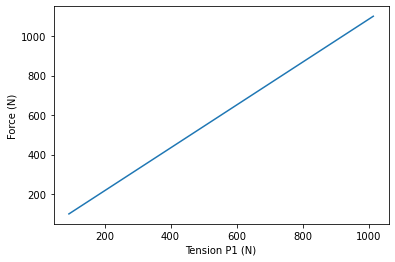

In [97]:
Fv2 = np.arange(100,1101,10)
P1a2 = np.zeros(len(Fv2))
for i in range(len(Fv2)):
    bv2 = np.array([0,-Fv2[i]*np.sin(theta3),Fv2[i]*np.cos(theta3),0,0,0])
    xv2, Augv2 = GaussNaive(Aq3,bv2)
    P1a2[i] = xv2[0]
plt.figure();
plt.plot(abs(P1a2),Fv2);
plt.ylabel("Force (N)");
plt.xlabel("Tension P1 (N)");


The following cells plot a best fit line for stress-relaxation data using a prony series model

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

Sdata = np.loadtxt('https://raw.githubusercontent.com/Uconnpem/CompMech/master/data/stress_relax.dat', delimiter = ',', skiprows = 1)
Sdata = pd.DataFrame(Sdata, columns = ['t','str'])
t = Sdata['t']
st = Sdata['str']
ze = np.zeros(len(t))

In [41]:
e = np.e
Z = np.block([[e**(-t/1.78)],[e**(-t/11)],[e**(-t/53)],[e**(-t/411)],[e**ze]]).T


In [42]:
a = np.linalg.solve(Z.T@Z,Z.T@st)
a

array([ 1.9 ,  3.27,  1.06,  2.28, 30.55])

In [43]:
t_fcn=np.linspace(min(t),max(t), 70)
Z1 = np.block([[e**(-t_fcn/1.78)],[e**(-t_fcn/11)],[e**(-t_fcn/53)],[e**(-t_fcn/411)],[e**np.zeros(len(t_fcn))]]).T

In [44]:
plt.style.use('seaborn')

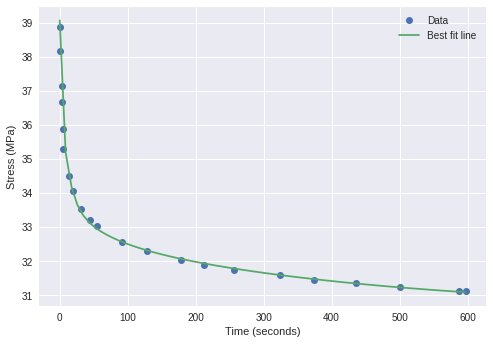

In [45]:
plt.plot(t,st,'o',label='Data')
plt.plot(t_fcn,Z1@a,label='Best fit line')
plt.xlabel('Time (seconds)')
plt.ylabel('Stress (MPa)')
plt.legend();
plt.grid(True)

The following cells find a splitwise best fit line for US and EU energy consumption since 1965 and makes a prediction for energy consumption by 2025.

In [30]:
url = 'https://raw.githubusercontent.com/Uconnpem/CompMech/master/data/primary-energy-consumption-by-region.csv'
energy_data = pd.read_csv(url)
EU = energy_data[energy_data['Entity'] =='Europe']
US = energy_data[energy_data['Entity'] =='United States']

In [31]:
teE = EU['Year'].values
energyE = EU['Primary Energy Consumption (terawatt-hours)']

teU = US['Year'].values
energyU = US['Primary Energy Consumption (terawatt-hours)']

In [32]:
Ze = np.block([[teE],[teE**0],[(teE-1970)*(teE>=1970)]]).T


AeE = np.linalg.solve(Ze.T@Ze,Ze.T@energyE)
AeU = np.linalg.solve(Ze.T@Ze,Ze.T@energyU)

print(AeE)

[ 1.51e+03 -2.95e+06 -1.35e+03]


In [35]:
te2 = np.linspace(np.min(teE),np.max(teE),100)
Ze2 = np.block([[te2],[te2**0],[(te2-1970)*(te2>=1970)]]).T

In [36]:
len(teE)

54

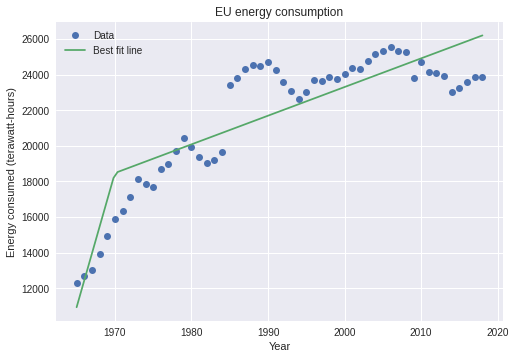

In [37]:
plt.plot(teE,energyE,'o',label='Data')
plt.plot(te2,Ze2@AeE,label='Best fit line')
plt.title('EU energy consumption')
plt.xlabel('Year')
plt.ylabel('Energy consumed (terawatt-hours)')
plt.legend();
plt.grid(True)
# It looks like I made a mistake in plotting the data, but there was actually just a massive jump in energy consumption
# from 84 to 85

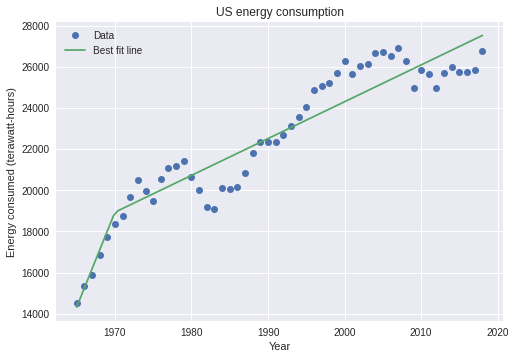

In [38]:
plt.plot(teE,energyU,'o',label='Data')
plt.plot(te2,Ze2@AeU,label='Best fit line')
plt.title('US energy consumption')
plt.xlabel('Year')
plt.ylabel('Energy consumed (terawatt-hours)')
plt.legend();
plt.grid(True)

In [39]:
t2025 = np.array([[2025,1,2025-1970]])
EU2025 = t2025@AeE
US2025 = t2025@AeU

print(f"My prediction for EU energy consumption in 2025 is {EU2025[0]:.2f} terawatt-hours")
print(f"My prediction for US energy consumption in 2025 is {US2025[0]:.2f} terawatt-hours")

My prediction for EU energy consumption in 2025 is 27322.11 terawatt-hours
My prediction for US energy consumption in 2025 is 28773.82 terawatt-hours
